# pNarrative
A python module for the extraction of sentiment and sentiment-based plot arcs from text. Inspired from Matthew Jockers' [Syuzhet](https://github.com/mjockers/syuzhet) R package, but with another method for extracting/estimating the "macro" shape of narratives, namely using the probabilistic framework of Gaussian Processes.  


The GP implementation for this module is using the pseudo code from C. E. Rasmussen's & C. K. I. Williams's [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/chapters/RW.pdf) (Algorithm 2.1, p. 19)


## Installation




## Demonstration

For this particular demonstration we will use the Swedish written book ["Bannlyst"](http://www.gutenberg.org/cache/epub/39147/pg39147.txt) by the late author Selma Lagerlöv, accessed through the website of the Gutenberg project.

In [1]:
from pNarrative import Narrative
import requests
import matplotlib.pylab as plt

example_URL = "http://www.gutenberg.org/cache/epub/39147/pg39147.txt"
r = requests.get(example_URL)
book = Narrative.Narrative(r.text, lower =True)
print("Number of sentences: {}\n\n".format(book.nrSentences))

print("Examples of sentences:")
print("_"*80)
for i, sent in enumerate(book.sentences[200:205]):
    print("\t{}. {:<200}".format(i+1, sent))

Number of sentences: 5158


Examples of sentences:
________________________________________________________________________________
	1. på måndagen var det också fester och tillställningar, men
sen på en gång var det stopp.                                                                                                                
	2. det hade kommit ut onda rykten om
nordpolsfararna.                                                                                                                                                     
	3. hustruns ansikte stelnade till.                                                                                                                                                                         
	4. ska jag nu få höra, att han har gjort något orätt?                                                                                                                                                      
	5. mumlade hon mellan
hårt sammanbitna tänder.   

You could use any custom sentiment lexicon to extract the sentence sentiments, but in this case we will use the [AFINN-SV-165](https://github.com/fnielsen/afinn/blob/master/afinn/data/AFINN-sv-165.txt) sentiment lexicon. The "create_lexicon" function takes a .txt file and converts it to a dictonary-formed python object.

In [2]:
from pNarrative.parser.sentiment_scorer import *
lexicon = create_lexicon("./pNarrative/data/lexicons/afinn/AFINN-sv-165.txt", delim="\t")

Then we simply run the __get\_sentiment\_score__ method to get the sentence sentiments and __get\_narrative\_estimation__ the get the "macro" shape. For this particular case, we'll use the rbf (radial basis function), a.k.a. the squared expontential, kernel with $\sigma = 1$ and $\ell = 20$. 

In [10]:
%%timeit
book.get_sentiment_score(lexicon=lexicon)
from pNarrative.kernels.rbf import rbf
book.get_narrative_estimation(kernel= rbf, kernel_parameters= {"el":20, "sigma":1})

646 ms ± 52.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


To Plot the estimated narratie, use the __plot\_narrative__ method

__Without Scaling:__

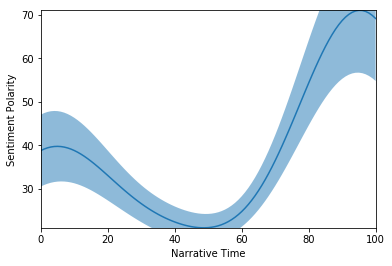

In [11]:
book.plot_narrative(plot_errors=True, scale_narrative=False)
plt.show()


__With Scaling:__

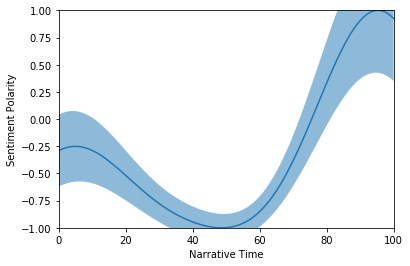

In [12]:
book.plot_narrative(plot_errors=True, scale_narrative=True)
plt.show()

You could also use other kernel parameters as below

In [16]:
from pNarrative.kernels.rbf import rbf
book.get_narrative_estimation(kernel=rbf, kernel_parameters= {"el":15, "sigma":1})

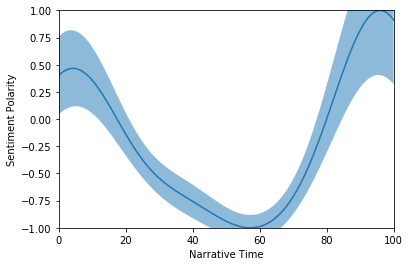

In [17]:
book.plot_narrative(plot_errors=True, scale_narrative=True)
plt.show()